<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/Data_Wrangling_101_Pandas_in_Action/Data_Wrangling_101_Pandas_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling 101: Pandas in Action !!!

In this workshop, we will be working with a small penguin data set to learn fundamental Pandas functions.

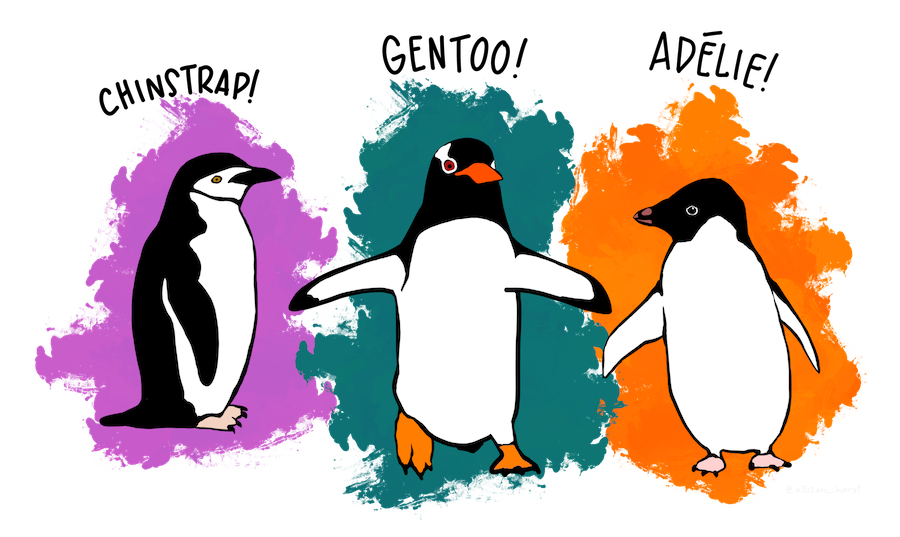

# Import the pandas library

In order to use `pandas`, we have to import the module using an `import` statement.

To learn more about the import statement, see: https://docs.python.org/3/reference/import.html

[possibly add a bit about how to download pandas - not already installed, you have to go get it]
[pip, venv, conda...]

In [ ]:
import pandas as pd

For the rest of the notebook, we can access the `pandas` libary through the *alias* `pd`.

# Read tabular data

*read_csv()* creates a DataFrame from a .csv (Comma-Separated Value) file (where the data is separated by commas and new lines).

`pandas` can also read from other file formats, including Excel, JSON, HDF5, SQL.... To learn more, see the docs:

https://pandas.pydata.org/docs/user_guide/io.html

In [ ]:
url = 'https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv'
df_original = pd.read_csv(url)
df = df_original.copy()

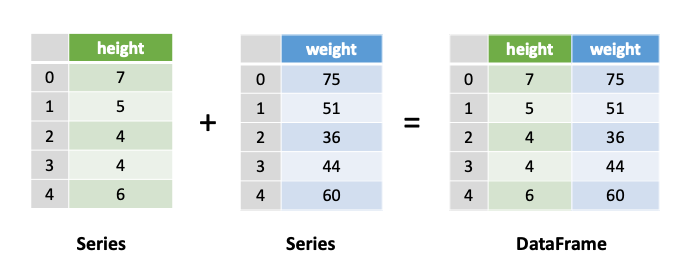

- *head()* shows the first 5 rows of a dataframe by default
- *tail()* shows the last 5 rows of a dataframe by default
  - We can override this behavior by providing an argument with the number of rows we want to see
- the leftmost number is the row number in the dataframe
  - **remember, Python indexes from 0**

In [ ]:
print(df.head())
print(df.tail(3))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
341  Gentoo  Biscoe              50.4             15.7              222.0   
342  Gentoo  Biscoe              45.2             14.8              212.0   
343  Gentoo  Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
341       5750.0    MALE  
342       5200.0  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


*info()* returns summary information about the csv file we read.

We can see that there are 7 columns, and 344 rows. Of the columns, 4 contain floating point values, and 3 contain strings.

Notice that the non-null count is not the same for all of the columns. This means that some of the rows do not have a value for that column, and we will want to deal with this later.



# Basic DataFrame properties

In [ ]:
rows = df.shape[0]
cols = df.shape[1]

print(f'{df.shape} --> {rows} rows and {cols} columns')

(344, 7) --> 344 rows and 7 columns


The *shape* property returns a tuple which tells us that our data has 344 columns and 7 rows.

[ For more information on tuples, see: https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences ]

In [ ]:
df.axes

[RangeIndex(start=0, stop=344, step=1),
 Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
        'flipper_length_mm', 'body_mass_g', 'sex'],
       dtype='object')]

We can also extract the names of all the columns using `.columns`:


In [ ]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Selecting subsets of dataframes


### Selecting by column

We can select a single column of our DataFrame by name:

In [ ]:
df[['species']]

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


We can select a subset with multiple columns:

In [ ]:
df[['species', 'flipper_length_mm', 'body_mass_g']]

,species,flipper_length_mm,body_mass_g
0,Adelie,181.0,3750.0
1,Adelie,186.0,3800.0
2,Adelie,195.0,3250.0
3,Adelie,NaN,NaN
4,Adelie,193.0,3450.0
...,...,...,...
339,Gentoo,NaN,NaN
340,Gentoo,215.0,4850.0
341,Gentoo,222.0,5750.0
342,Gentoo,212.0,5200.0


## Selecting by index

*iloc[ ]* provides integer-location based indexing for selection by position.

In [ ]:
df.iloc[0] # selects the row at index 0

species                 Adelie
island               Torgersen
culmen_length_mm          39.1
culmen_depth_mm           18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

*iloc[ ]* also support the slicing operation, so we can specify a specific range of rows from a DataFrame. As with Python slicing, the last index is excluded from the slice.

In [ ]:
df.iloc[5:10] # selects rows 5 through 9

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
df.iloc[5:10, 1:3] # selects rows 5 through 9, columns 1 and 2

,island,culmen_length_mm
5,Torgersen,39.3
6,Torgersen,38.9
7,Torgersen,39.2
8,Torgersen,34.1
9,Torgersen,42.0


## Selecting by condition

We can also filter our data based on conditions.

This generally takes the form:

```
df[condition]
```

The condition is an expression that creates a Series of Boolean values. When used to index into a DataFrame, only the rows where the Boolean is True are returned. (This is referred to as a *mask*)

For example, let's pick only female penguins:

In [ ]:
# example condition
df['sex'] == 'FEMALE'

0      False
1       True
2       True
3      False
4       True
       ...  
339    False
340     True
341    False
342     True
343    False
Name: sex, Length: 344, dtype: bool

In [ ]:
df[df['sex'] == 'FEMALE']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE


Or only penguins with a flipper length above 200 mm:

In [ ]:
df[df['flipper_length_mm'] > 200]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
90,Adelie,Dream,35.7,18.0,202.0,3550.0,FEMALE
91,Adelie,Dream,41.1,18.1,205.0,4300.0,MALE
95,Adelie,Dream,40.8,18.9,208.0,4300.0,MALE
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,MALE
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We can combine multiple conditions:

In [ ]:
df[(df['flipper_length_mm'] > 200) & (df['island'] == 'Torgersen')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,MALE
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,MALE


And also combine the various ways of selecting data. Here, we select only two columns where this condition is true.

In [ ]:
df[['species', 'body_mass_g']][(df['flipper_length_mm'] > 200) & (df['island'] == 'Torgersen')]

,species,body_mass_g
123,Adelie,3875.0
129,Adelie,4000.0


# Manipulating DataFrames

## Deriving new columns from existing columns

### Deriving from a single column

We can 'derive' a new column from another column, for example performing a unit conversion. This process would perform a manipulation on the data in a given column, ans save the results to a new column:

In [ ]:
df['culmen_length_in'] = round(0.039 * df['culmen_length_mm'], 1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_in
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.5
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.5
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.6
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.4


A column with the name 'culmen_length_in' is created with the new data.

### Deriving from multiple columns

We can also derive a new column based on multiple other columns. For example, let's calculate the ratio of culmen length to culmen depth.

In [ ]:
df['culmen_ratio'] = round(df['culmen_length_mm'] / df['culmen_depth_mm'], 1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_in,culmen_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.5,2.1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.5,2.3
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.6,2.2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.4,1.9


### Dropping columns

Let's try to drop the two columns we created in the DataFrame.

In [ ]:
df.drop(['species', 'island'], axis=1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_in,culmen_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.5,2.1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.5,2.3
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.6,2.2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.4,1.9


What happened? The *drop()* method returns a new DataFrame without the dropped columns, but our *df* variable contains the old DataFrame. We can either overwrite our variable *df* with the new DataFrame, or we can use the *inplace* argument to specify that the rows should be dropped from our DataFrame.

In [ ]:
# overwrite df variable with new DataFrame
df = df.drop(['species', 'island'], axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_length_in,culmen_ratio
0,39.1,18.7,181.0,3750.0,MALE,1.5,2.1
1,39.5,17.4,186.0,3800.0,FEMALE,1.5,2.3
2,40.3,18.0,195.0,3250.0,FEMALE,1.6,2.2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE,1.4,1.9


In [ ]:
# use the inplace argument to specify that the rows should be dropped "in place"
df.drop(['flipper_length_mm'], axis=1, inplace=True)
df.head()

,culmen_length_mm,culmen_depth_mm,body_mass_g,sex,culmen_length_in,culmen_ratio
0,39.1,18.7,3750.0,MALE,1.5,2.1
1,39.5,17.4,3800.0,FEMALE,1.5,2.3
2,40.3,18.0,3250.0,FEMALE,1.6,2.2
3,NaN,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,3450.0,FEMALE,1.4,1.9


There is an additional catch to using the *inplace* argument. If we had two variables with the same DataFrame, and we dropped columns in place, then both variables are affected.

In [ ]:
new_df = df
df.drop(['culmen_length_mm'], axis=1, inplace=True)
print(df.head())
print(new_df.head())

   culmen_depth_mm  body_mass_g     sex  culmen_length_in  culmen_ratio
0             18.7       3750.0    MALE               1.5           2.1
1             17.4       3800.0  FEMALE               1.5           2.3
2             18.0       3250.0  FEMALE               1.6           2.2
3              NaN          NaN     NaN               NaN           NaN
4             19.3       3450.0  FEMALE               1.4           1.9
   culmen_depth_mm  body_mass_g     sex  culmen_length_in  culmen_ratio
0             18.7       3750.0    MALE               1.5           2.1
1             17.4       3800.0  FEMALE               1.5           2.3
2             18.0       3250.0  FEMALE               1.6           2.2
3              NaN          NaN     NaN               NaN           NaN
4             19.3       3450.0  FEMALE               1.4           1.9


If you want to make a copy of a DataFrame before doing any operations to it, you can do so. After making a copy, any changes to the original DataFrame will not be reflected in the copy.

In [ ]:
new_df = df.copy()
df.drop(['culmen_depth_mm'], axis=1, inplace=True)
print(df.head())
print(new_df.head())

   body_mass_g     sex  culmen_length_in  culmen_ratio
0       3750.0    MALE               1.5           2.1
1       3800.0  FEMALE               1.5           2.3
2       3250.0  FEMALE               1.6           2.2
3          NaN     NaN               NaN           NaN
4       3450.0  FEMALE               1.4           1.9
   culmen_depth_mm  body_mass_g     sex  culmen_length_in  culmen_ratio
0             18.7       3750.0    MALE               1.5           2.1
1             17.4       3800.0  FEMALE               1.5           2.3
2             18.0       3250.0  FEMALE               1.6           2.2
3              NaN          NaN     NaN               NaN           NaN
4             19.3       3450.0  FEMALE               1.4           1.9


### Dropping rows

We can also drop rows, using the *index* argument. Note that all of the comments about copies apply when dropping rows as well.

In [ ]:
# drop all rows from 100 to the end of the DataFrame
new_df.drop(index=df.index[100:], axis=0)

,culmen_depth_mm,body_mass_g,sex,culmen_length_in,culmen_ratio
0,18.7,3750.0,MALE,1.5,2.1
1,17.4,3800.0,FEMALE,1.5,2.3
2,18.0,3250.0,FEMALE,1.6,2.2
3,NaN,NaN,NaN,NaN,NaN
4,19.3,3450.0,FEMALE,1.4,1.9
...,...,...,...,...,...
95,18.9,4300.0,MALE,1.6,2.2
96,18.6,3700.0,FEMALE,1.5,2.0
97,18.5,4350.0,MALE,1.6,2.2
98,16.1,2900.0,FEMALE,1.3,2.1


# Basic data cleaning

Let's return to the issue we noticed at the start: some of the rows lack values for certain columns. We'd like to get rid of those rows before we do anything else.

In [ ]:
# Let's restart with a fresh copy of our data...
df = df_original.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We can find the location of null values with the method *isnull()*.

In [ ]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


One easy way is to drop all of these rows is to use the *dropna()* method. The following code drops any rows with missing values.

In [ ]:
df.dropna(axis=0, inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


There are alternate ways to do this. This is an equivalent way to drop all rows with null values:

In [ ]:
df.drop(index=df[df['culmen_length_mm'].isnull()].index, inplace=True) # previous code already dropped these

Or you could drop data based on some other condition:

In [ ]:
df.drop(index=df[df['culmen_length_mm'] > 40].index).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 150
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            96 non-null     object 
 1   island             96 non-null     object 
 2   culmen_length_mm   96 non-null     float64
 3   culmen_depth_mm    96 non-null     float64
 4   flipper_length_mm  96 non-null     float64
 5   body_mass_g        96 non-null     float64
 6   sex                96 non-null     object 
dtypes: float64(4), object(3)
memory usage: 6.0+ KB


# Calculate summary statistics

Now that we have cleaned up our data, we can calculate and display summary statistics very easily with pandas.

In [ ]:
stats = df.describe()
stats

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


The *describe()* method returns for each numeric column:
- count: number of data
- mean: arithmetic mean
- std: the standard deviation
- min: the minimum value of the variable
- 25%: first quartile
- 50%: the median value
- 75%: the third quartile
- max: the maximum value of the variable

By default, *describe()* will only include the columns with numeric values.

We can use describe with categorical columns, if we call it on only the categorical columns.

In [ ]:
categorical_stats = df[['species', 'island', 'sex']].describe()
categorical_stats

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


Here, the *describe()* method returns:
- count: a count of the number of NaN entries in the column
- unique: the number of unique values
- top: most frequent
- freq: the frequency of the top value

Because it's a DataFrame, we can access the values with the same methods we have already been using:

In [ ]:
stats[['culmen_length_mm']]

,culmen_length_mm
count,342.000000
mean,43.921930
std,5.459584
min,32.100000
25%,39.225000
50%,44.450000
75%,48.500000
max,59.600000


In [ ]:
stats.loc['mean', 'culmen_length_mm']

43.9219298245614

# Sorting and grouping data

In [ ]:
df.sort_values(by='island') #by default, ascending sort

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
108,Adelie,Biscoe,38.1,17.0,181.0,3175.0,FEMALE
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,MALE
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,FEMALE
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,MALE
...,...,...,...,...,...,...,...
72,Adelie,Torgersen,39.6,17.2,196.0,3550.0,FEMALE
71,Adelie,Torgersen,39.7,18.4,190.0,3900.0,MALE
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,FEMALE
68,Adelie,Torgersen,35.9,16.6,190.0,3050.0,FEMALE


In [ ]:
df.sort_values(by='flipper_length_mm', ascending=False).head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,MALE
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,MALE


In [ ]:
df[df['sex']=='FEMALE'].sort_values(by='body_mass_g')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,FEMALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,FEMALE
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,FEMALE
174,Chinstrap,Dream,43.2,16.6,187.0,2900.0,FEMALE
...,...,...,...,...,...,...,...
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
254,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,FEMALE
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,FEMALE


Lets chain together some of our basic operations to make a new table.

In [ ]:
males = df[df['sex']=='MALE'].sort_values(by='body_mass_g', ascending=False).head()
females = df[df['sex']=='FEMALE'].sort_values(by='body_mass_g', ascending=False).head()
stacked = pd.concat([males, females])

stacked

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,FEMALE
254,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,FEMALE
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE


# Formatting DataFrames

In [ ]:
table = stacked.to_markdown(index=False)
table

'| species   | island   |   culmen_length_mm |   culmen_depth_mm |   flipper_length_mm |   body_mass_g | sex    |\n|:----------|:---------|-------------------:|------------------:|--------------------:|--------------:|:-------|\n| Gentoo    | Biscoe   |               49.2 |              15.2 |                 221 |          6300 | MALE   |\n| Gentoo    | Biscoe   |               59.6 |              17   |                 230 |          6050 | MALE   |\n| Gentoo    | Biscoe   |               51.1 |              16.3 |                 220 |          6000 | MALE   |\n| Gentoo    | Biscoe   |               48.8 |              16.2 |                 222 |          6000 | MALE   |\n| Gentoo    | Biscoe   |               45.2 |              16.4 |                 223 |          5950 | MALE   |\n| Gentoo    | Biscoe   |               45.2 |              14.8 |                 212 |          5200 | FEMALE |\n| Gentoo    | Biscoe   |               46.5 |              14.8 |                 217 |

| species   | island   |   culmen_length_mm |   culmen_depth_mm |   flipper_length_mm |   body_mass_g | sex    |
|:----------|:---------|-------------------:|------------------:|--------------------:|--------------:|:-------|
| Gentoo    | Biscoe   |               49.2 |              15.2 |                 221 |          6300 | MALE   |
| Gentoo    | Biscoe   |               59.6 |              17   |                 230 |          6050 | MALE   |
| Gentoo    | Biscoe   |               51.1 |              16.3 |                 220 |          6000 | MALE   |
| Gentoo    | Biscoe   |               48.8 |              16.2 |                 222 |          6000 | MALE   |
| Gentoo    | Biscoe   |               45.2 |              16.4 |                 223 |          5950 | MALE   |
| Gentoo    | Biscoe   |               45.2 |              14.8 |                 212 |          5200 | FEMALE |
| Gentoo    | Biscoe   |               46.5 |              14.8 |                 217 |          5200 | FEMALE |
| Gentoo    | Biscoe   |               49.1 |              14.8 |                 220 |          5150 | FEMALE |
| Gentoo    | Biscoe   |               44.9 |              13.3 |                 213 |          5100 | FEMALE |
| Gentoo    | Biscoe   |               45.1 |              14.5 |                 207 |          5050 | FEMALE |

# Exporting to other file formats

In [ ]:
from datetime import date
import openpyxl
import xlrd

file_path = f'output-{date.today()}.xlsx'
stacked.to_excel(file_path, index=False)